In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

sys.path.insert(1, "../src")
from Loess import *

In [2]:
df = pd.read_csv("datasets/dataset.csv")

# Data
X = df[["radiation", "temperature", "wind"]].to_numpy()
# Target variable
y = df["ozone"].to_numpy()

In [3]:
loess = Loess(X, y)

f = 0.4

y_hat = np.array([loess.estimate(x, window=int(len(X)*f), degree=1) for x in X])

Text(0, 0.5, 'Ozone')

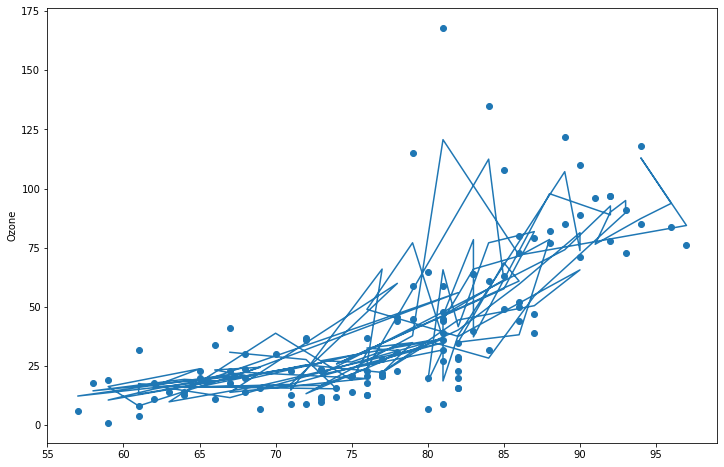

In [4]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_hat)
plt.ylabel("Ozone")

# Experiments (section 5 paper)

---
## Normal probability plot

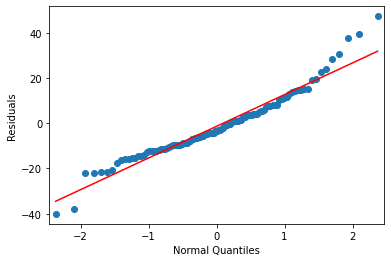

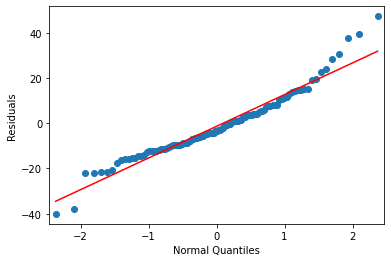

In [5]:
import seaborn as sns
import statsmodels.graphics.gofplots as sm

residuals = y - y_hat

sm.ProbPlot(residuals).qqplot(line="s", xlabel="Normal Quantiles", ylabel="Residuals")

In [6]:
f = 2/3

Text(0, 0.5, 'Absolute Residuals')

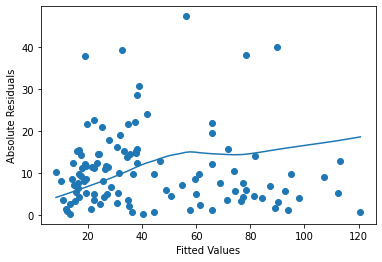

In [7]:
loess = Loess(y_hat, np.abs(residuals))

reg_residuals = np.array([loess.estimate(x, window=int(len(X)*f), degree=1) for x in y_hat.reshape((111,1))])

reg_residuals = reg_residuals[np.argsort(y_hat)]

y_hat = np.sort(y_hat)

plt.scatter(y_hat, np.abs(residuals))
plt.plot(y_hat, reg_residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Absolute Residuals")

In [19]:
def var_vs_residual(variable):
    data = df[variable].to_numpy()

    loess = Loess(data, residuals)

    reg_residuals = np.array([loess.estimate(x, window=int(len(data)*f), degree=1) for x in data.reshape((111,1))])

    reg_residuals = reg_residuals[np.argsort(data)]

    y_hat = np.sort(data)

    plt.scatter(data, residuals)
    plt.plot(y_hat, reg_residuals)
    plt.xlabel(variable)
    plt.ylabel("Residuals")

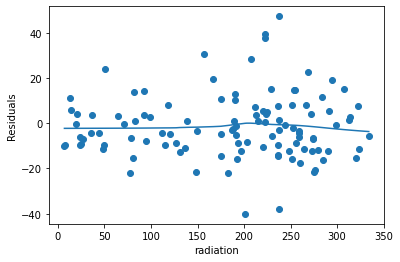

In [20]:
var_vs_residual("radiation")

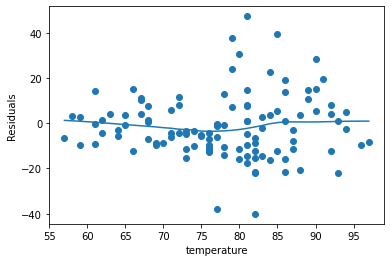

In [21]:
var_vs_residual("temperature")

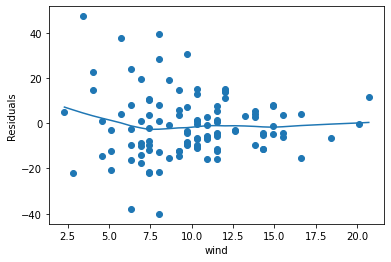

In [22]:
var_vs_residual("wind")

---
Probando con la seno

In [5]:
X = np.linspace(0, 2, num=100)
y_s = np.sin(X * np.pi) + (np.random.normal(0, 0.15, size=len(X)))

l = Loess(X, y_s)

In [6]:
y_t = np.array([l.estimate(x, window=50, degree=2) for x in X.reshape((100,1))])

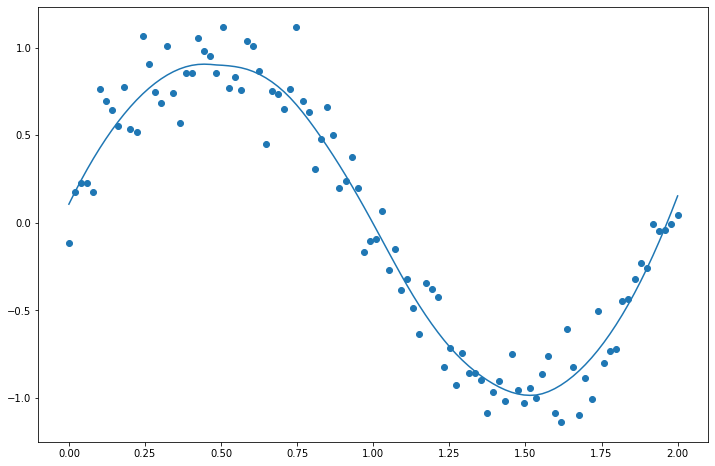

In [7]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X, y_s)
plt.plot(X, y_t)
plt.show()